In [1]:
# These are the standard imports for CS 111.
# This list may change as the quarter goes on.
import os
import time
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import linalg as spla
import scipy.sparse
import scipy.sparse.linalg
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import cs111
%matplotlib inline
np.set_printoptions(precision = 4)

Size of matrix M: (534, 800)


Text(0.5, 1.0, 'Original image, 534 by 800 pixels')

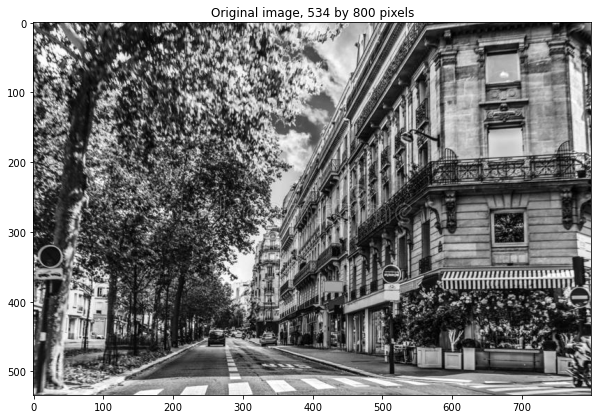

In [2]:
image = plt.imread( "Paris.jpeg" ) 

M = np.float64( image[:,:] )
nrows, ncols = M.shape
print( "Size of matrix M:", M.shape )


# Plot the original image (matrix).
plt.figure( figsize=(10, 10) )
plt.gray()
plt.imshow( M )
plt.title( "Original image, {} by {} pixels".format( nrows, ncols ) )

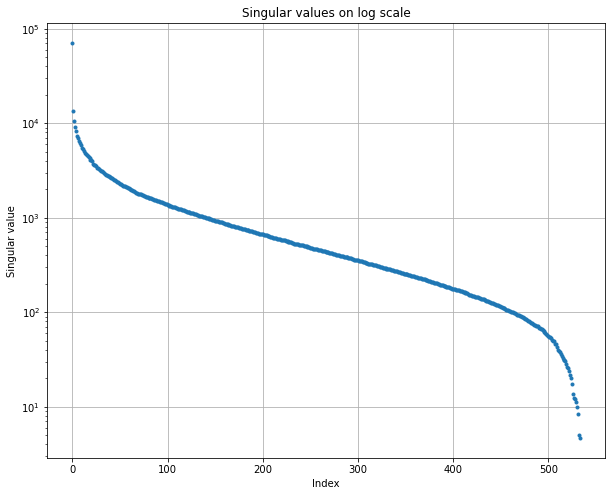

In [3]:
#SVD Compression
U, sigma, Vt = spla.svd( M )
fig0 = plt.figure( figsize=(10,8) )
plt.plot( sigma, "." )
plt.yscale( "log" )
plt.title( "Singular values on log scale" )
plt.ylabel( "Singular value" )
plt.xlabel( "Index" )
plt.grid()

k = 300 : 
Relative error = 0.004963334320028685

k = 250 : 
Relative error = 0.0067893440781404

k = 200 : 
Relative error = 0.009360749206456445

k = 150 : 
Relative error = 0.013027022806244406

k = 100 : 
Relative error = 0.019194994171591005



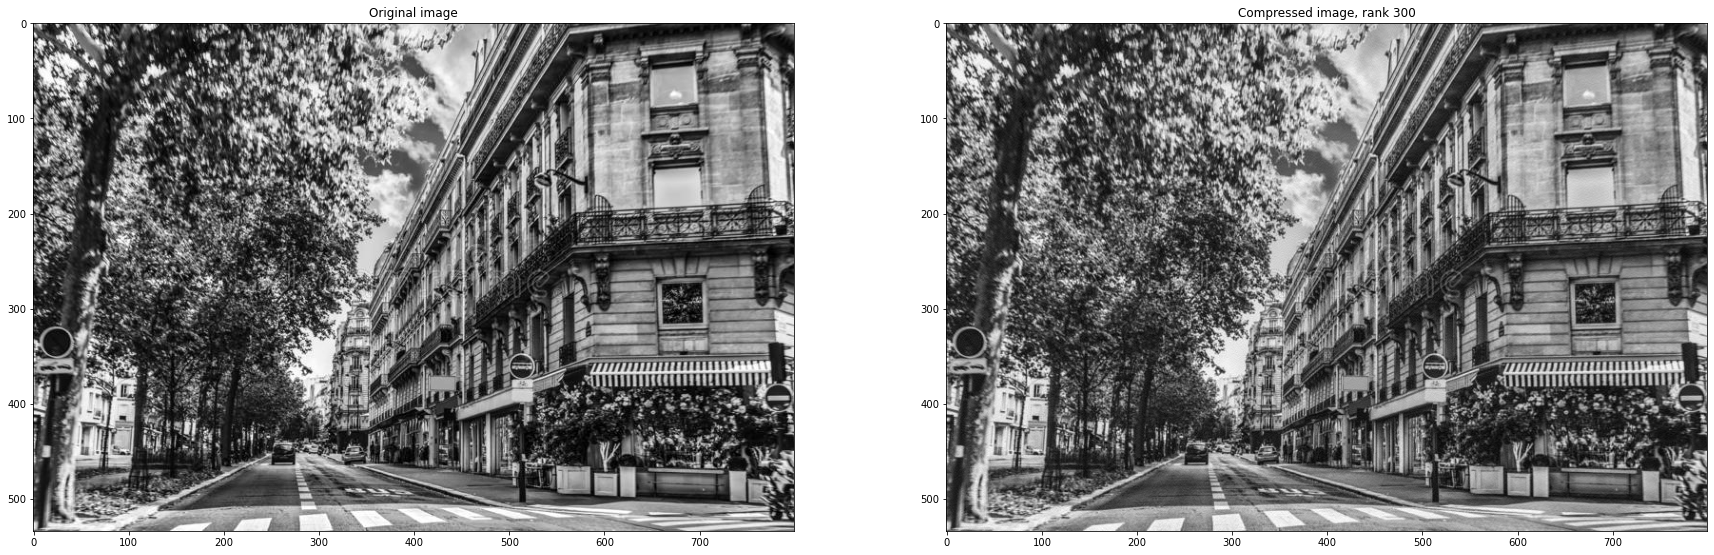

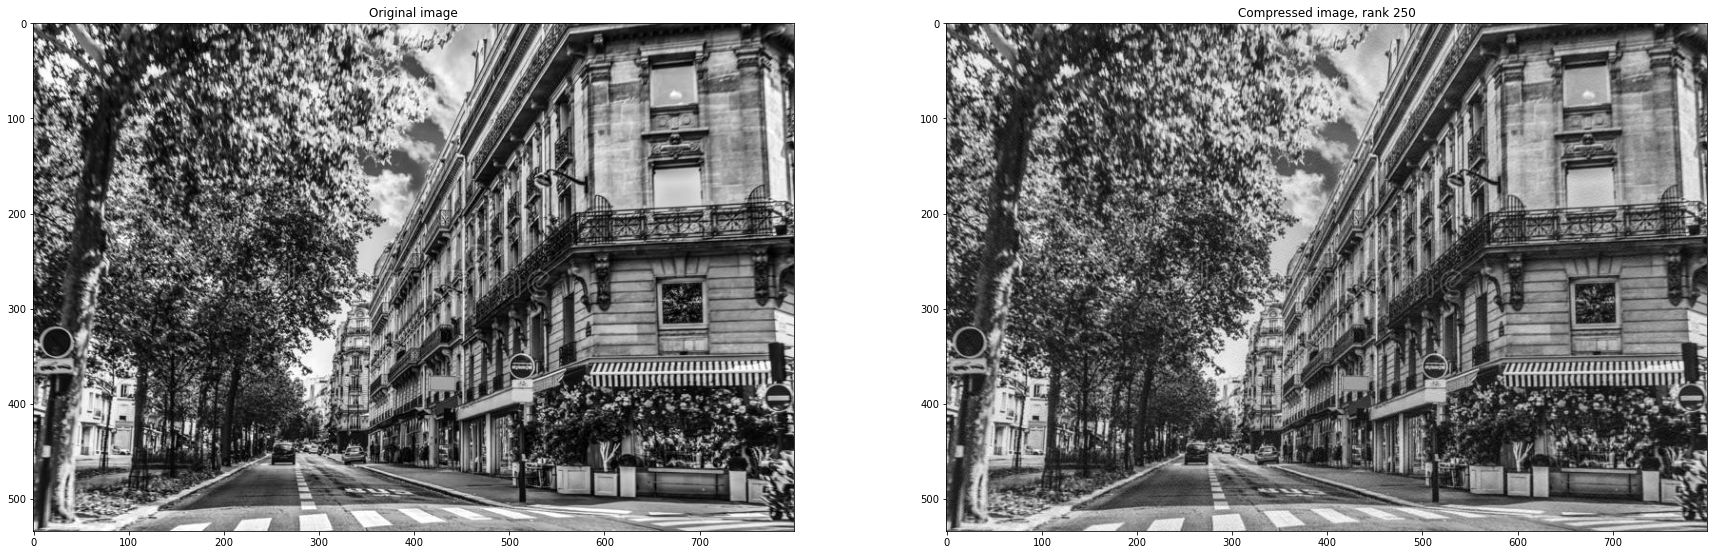

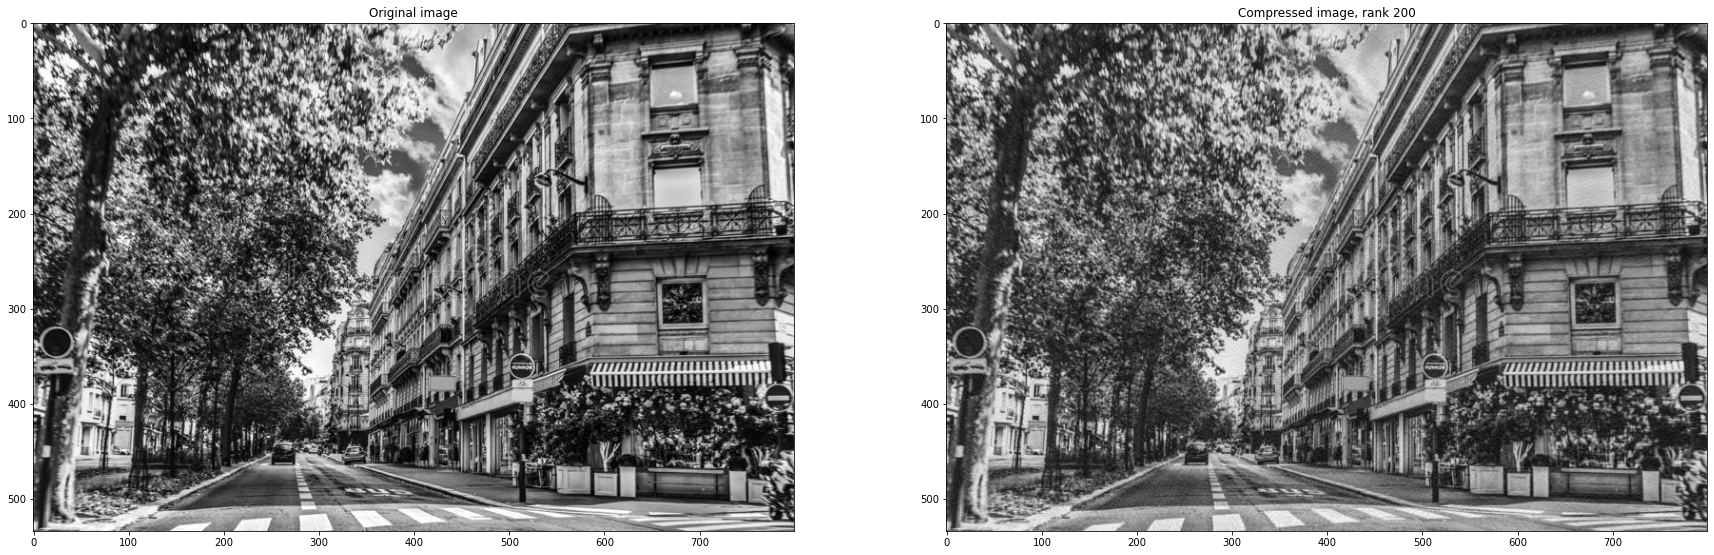

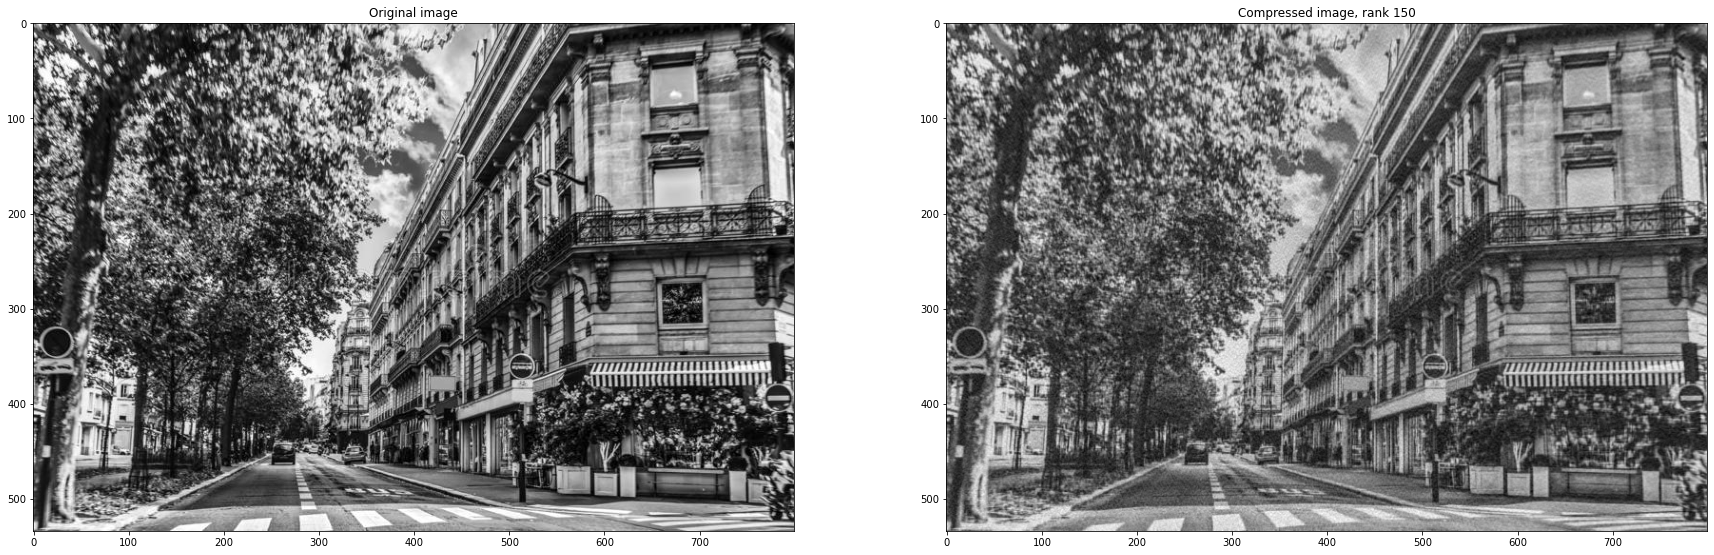

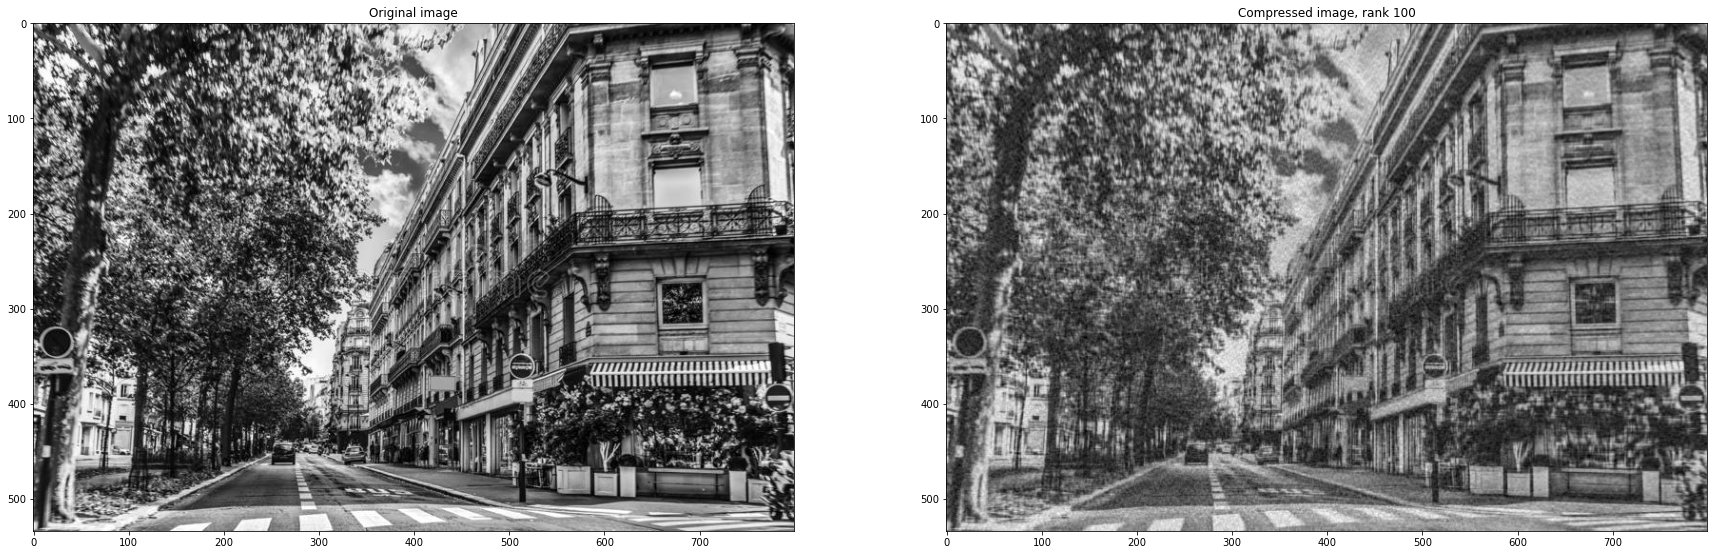

In [4]:
#SVD Compression
U, sigma, Vt = spla.svd( M )
k = [300, 250, 200, 150, 100]
nrows, ncols = M.shape
Mk = np.zeros( M.shape )
for i in range(len(k)):
    for j in range( k[i] ):
        Mk += sigma[j] * np.outer( U[:,j], Vt[j,:] )
    print("k =", k[i], ": ")
    print( "Relative error =", sigma[k[i]] / sigma[0] )
    print()
    plt.figure(figsize=(30,30))
    plt.gray()
    plt.subplot(1,2,1)
    plt.imshow(M)
    plt.title( "Original image")
    plt.subplot(1,2,2)
    plt.imshow(Mk)
    plt.title( "Compressed image, rank {}".format( k[i] ) )
    Mk = np.zeros( M.shape )

In [5]:
k = 191
for i in range( k ):
    Mk += sigma[i] * np.outer( U[:,i], Vt[i,:] )
print( "2-norm(M) =", npla.norm( M, 2 ) )
print( " sigma[0] =", sigma[0] )
print()
print( "2-norm(M{}-M) =".format( k ), npla.norm( Mk - M, 2 ) )
print( " sigma[{}] =".format( k ), sigma[k] )

2-norm(M) = 71289.4636764657
 sigma[0] = 71289.4636764657

2-norm(M191-M) = 709.7088385954427
 sigma[191] = 709.7088385954421


In [6]:
target_k = 0
for k in range(len(sigma)):
    if (sigma[k] <= 0.01*sigma[0]):
        print("k =", k)
        target_k = k
        break
print()
print( "Relative error =", sigma[k] / sigma[0] )

k = 191

Relative error = 0.009955311794970528


In [7]:
# print( "2-norm(M) =", npla.norm( M, 2 ) )
# print( " sigma[0] =", sigma[0] )
# print()
# print( "2-norm(M{}-M) =".format( k[i] ), npla.norm( Mk - M, 2 ) )
# print( " sigma[{}] =".format( k[i] ), sigma[k[i]] )
# print()
# Mstorage = nrows * ncols
# Mkstorage = k * (nrows + ncols + 1)
# print( "Storage needed for all of M:", Mstorage )
# print( "Storage needed for M{}: ".format( k ), Mkstorage )
# print()
# print( "Compression factor:", Mstorage / Mkstorage )